## Demo: Yeast Segmentation

In [4]:
import sys
import os
sys.path.append("../")

import yaml
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

from config_yml import ExperimentOptions
from trainer.train import DeepCellModule
from postprocess.post_process_utils import post_process_panoptic

### 01. Config

In [5]:
mode = 'test' #train, evl, test
model_dir = "../../deepyeast_001/"
config_path = "../configs/config_wl.yaml"
num_gpus=1

### 02. Load Model

In [6]:
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)
configs.model_options.backbone.drop_path_keep_prob=1

cellmodel = DeepCellModule(mode, model_dir, configs, num_gpus)

restoring or initializing model...
restored model from ../../deepyeast_001/ckpt-73000.
restored from checkpoint: ../../deepyeast_001/ckpt-73000


### 03. Read Image

Test your picture here

In [7]:
file_path = "../../deepyeast_001/images/test.png"
img = imread(file_path)

### 04. Prediction

In [9]:
%%time
output = cellmodel.predict(img)

CPU times: user 3min 53s, sys: 5.32 s, total: 3min 58s
Wall time: 46.7 s


### 05. Plot result

In [10]:
post_ouput = output["panoptic_pred"][0].numpy()
post_ouput = post_process_panoptic(post_ouput)

In [11]:
imsave(os.path.join("../../deepyeast_001/", os.path.basename(file_path)), post_ouput)

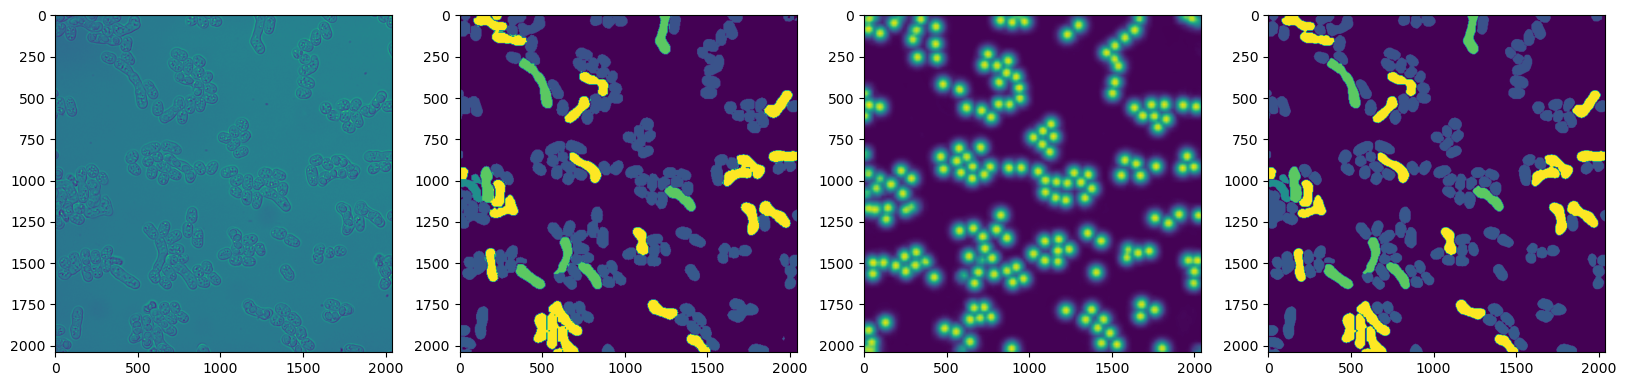

In [13]:
figs, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(img)
axs[1].imshow(output['panoptic_pred'][0])
axs[2].imshow(output['center_heatmap'][0])
axs[3].imshow(post_ouput)